In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df_tesla = pd.read_csv("TESLA Search Trend vs Price.csv")
df_unemployment2019  = pd.read_csv("UE Benefits Search vs UE Rate 2004-19.csv")
df_unemployment2020  = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
df_bitcoin_price = pd.read_csv("Daily Bitcoin Price.csv")
df_bitcoin_search = pd.read_csv("Bitcoin Search Trend.csv")

In [20]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [21]:
# What are the shapes of the DataFrames?
print(df_tesla.shape)
print(df_bitcoin_price.shape)
print(df_bitcoin_search.shape)
print(df_unemployment2019.shape)
print(df_unemployment2020.shape)
print(df_tesla.shape)

(124, 3)
(2204, 3)
(73, 2)
(181, 3)
(200, 3)
(124, 3)


In [22]:
# How many rows & columns do they have?
datasets = [df_bitcoin_price, df_bitcoin_search, df_tesla, df_unemployment2019, df_unemployment2020]
for dataset in datasets:
    print("Column Names: {}".format(dataset.columns))

Column Names: Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
Column Names: Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
Column Names: Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
Column Names: Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
Column Names: Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')


In [23]:
# What is the largest number in the search data column? Try using the .describe() function
for dataset in datasets:
    print("======================\n{}\n======================".format(dataset.describe()))

              CLOSE        VOLUME
count   2203.000000  2.203000e+03
mean    4429.421245  8.043622e+09
std     4148.150071  1.176529e+10
min      178.102997  5.914570e+06
25%      433.629502  6.029915e+07
50%     3637.520020  2.018890e+09
75%     7997.372803  1.322478e+10
max    19497.400391  7.415677e+10
       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000
       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007
       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std       

In [24]:
df_tesla.count()

MONTH              124
TSLA_WEB_SEARCH    124
TSLA_USD_CLOSE     124
dtype: int64

In [25]:
124 // 5

24

In [26]:
df_tesla.info()
df_bitcoin_price.info()
df_bitcoin_search.info()
df_unemployment2020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MONTH            124 non-null    object 
 1   TSLA_WEB_SEARCH  124 non-null    int64  
 2   TSLA_USD_CLOSE   124 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2204 non-null   object 
 1   CLOSE   2203 non-null   float64
 2   VOLUME  2203 non-null   float64
dtypes: float64(2), object(1)
memory usage: 51.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MONTH            73 non-null     object
 1   BTC_NEWS_SEARCH  7

In [27]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment2020.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_bitcoin_search.isna().values.any()}')
print(f'Missing values for BTC Price?: {df_bitcoin_price.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False
Missing values for BTC Price?: True


In [28]:
print(f'Missing values for BTC Price?: {df_bitcoin_price.isna().values.sum()}')

Missing values for BTC Price?: 2


In [29]:
df_bitcoin_price[df_bitcoin_price.CLOSE.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [30]:
df_bitcoin_price = df_bitcoin_price.dropna()

In [38]:
df_bitcoin_price.DATE = pd.to_datetime(df_bitcoin_price.DATE)
df_bitcoin_search.MONTH = pd.to_datetime(df_bitcoin_search.MONTH)
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment2020.MONTH = pd.to_datetime(df_unemployment2020.MONTH)

C:\Users\ozair\AppData\Local\Temp\ipykernel_26848\283807327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin_price.DATE = pd.to_datetime(df_bitcoin_price.DATE)


In [40]:
df_btc_monthly = df_bitcoin_price.resample('ME', on='DATE').last()

In [42]:
df_btc_monthly.shape

(73, 2)

In [43]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


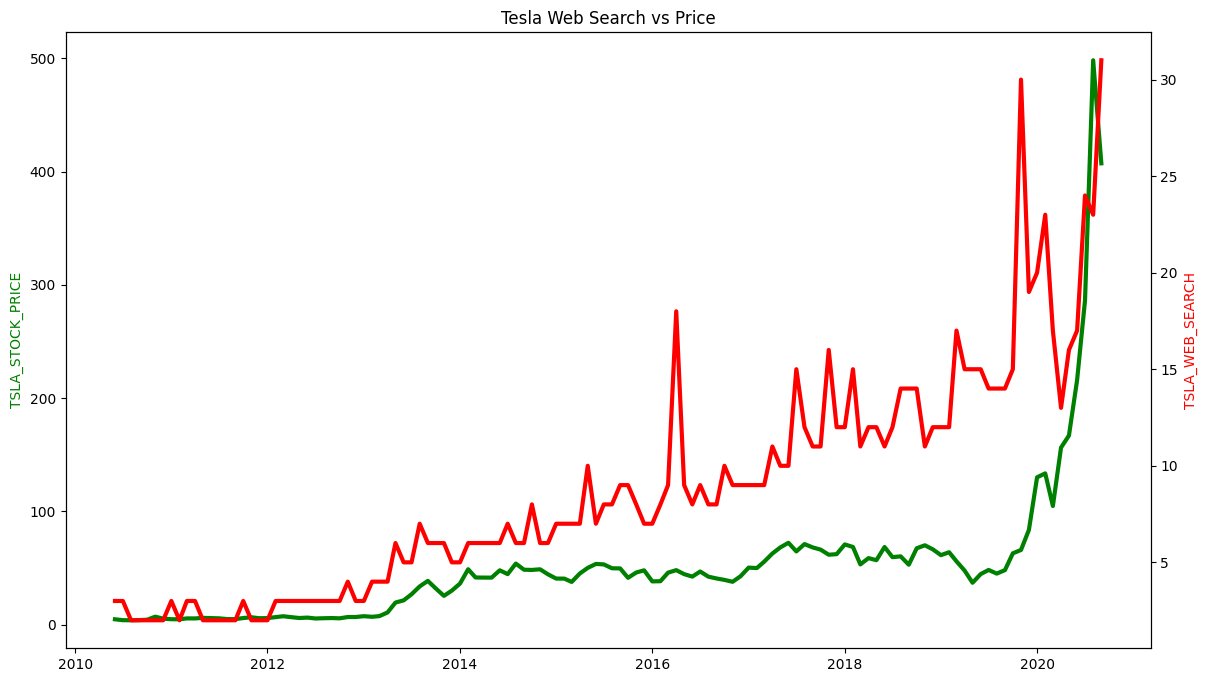

In [68]:
plt.figure(figsize=(14, 8))

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color = "green", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color = "red", linewidth=3)


ax1.set_ylabel("TSLA_STOCK_PRICE", color = "green")
ax2.set_ylabel("TSLA_WEB_SEARCH", color = "red")

plt.title("Tesla Web Search vs Price")
plt.xticks(fontsize=14, rotation=45)
plt.show()